<a href="https://colab.research.google.com/github/Shreya-data/Bank-Churners/blob/main/Decision_Tree_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
# Importing the libraries
import numpy as np                  
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , roc_auc_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [56]:
#to display more columns and more rows
pd.set_option("display.max_rows",1000)    
pd.set_option("display.max_columns",1000)

In [57]:
#Mount the Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
#load the dataset
dataset=pd.read_csv("/content/drive/MyDrive/BankChurners.csv")
dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [59]:
#shape of dataset
print("shape of dataset is :", dataset.shape)

shape of dataset is : (10127, 23)


In [60]:
#information about non-null count and dtype of each column 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [61]:
#list of column names
dataset.columns.values

array(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype=object)

In [62]:
# drop column which has no significance in the dataset
dataset.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','CLIENTNUM'],inplace=True)

In [63]:
#dataset after drop the columns
dataset.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [64]:
#check the count of null values in each columns
dataset.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [65]:
#descriptive statistics of numerical features
dataset.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [12]:
#descriptive statistics of categorical features
dataset.describe(include="object")

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [13]:
#get the categorical features name
cat_col=dataset.describe(include="object").columns.values
cat_col

array(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'], dtype=object)

In [14]:
a=[]    #make a empty list
for i in cat_col:
    b=pd.Series(dataset[i].value_counts())
    a.append(b)   #append value counts of each categorical features 

In [15]:
#This is the DataFrame where each value in dataset is column name and each feature is index
pd.DataFrame(a)

,Existing Customer,Attrited Customer,F,M,Graduate,High School,Unknown,Uneducated,College,Post-Graduate,Doctorate,Married,Single,Divorced,Less than $40K,$40K - $60K,$80K - $120K,$60K - $80K,$120K +,Blue,Silver,Gold,Platinum
Attrition_Flag,8500.0,1627.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,NaN,NaN,5358.0,4769.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Level,NaN,NaN,NaN,NaN,3128.0,2013.0,1519.0,1487.0,1013.0,516.0,451.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,NaN,NaN,NaN,NaN,NaN,NaN,749.0,NaN,NaN,NaN,NaN,4687.0,3943.0,748.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,NaN,NaN,NaN,NaN,NaN,NaN,1112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3561.0,1790.0,1535.0,1402.0,727.0,NaN,NaN,NaN,NaN
Card_Category,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9436.0,555.0,116.0,20.0


In [16]:
#to drop the missing value that is, "Unknown" 
data=dataset.replace({"Unknown":np.nan})
data.dropna(inplace=True)

In [17]:
#cross check the total count of null values throughout the dataset
data.isnull().sum().sum()

0

In [18]:
#same procedure
a=[]
for i in cat_col:
    b=pd.Series(dataset[i].value_counts())
    a.append(b)

In [19]:
#once again,call the categorical column name
cat_col

array(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'], dtype=object)

In [20]:
#all values present in dataset
pd.DataFrame(a).columns.values

array(['Existing Customer', 'Attrited Customer', 'F', 'M', 'Graduate',
       'High School', 'Unknown', 'Uneducated', 'College', 'Post-Graduate',
       'Doctorate', 'Married', 'Single', 'Divorced', 'Less than $40K',
       '$40K - $60K', '$80K - $120K', '$60K - $80K', '$120K +', 'Blue',
       'Silver', 'Gold', 'Platinum'], dtype=object)

In [21]:
#numerical encoding
encoders_nums = {'Attrition_Flag':{'Existing Customer':0,'Attrited Customer':1},
                 'Gender':{"M":1,"F":0},
                  'Education_Level':{'Graduate': 3,'High School': 1, 'Uneducated':0, 'College':2, 'Post-Graduate':4,
       'Doctorate':5},
                'Marital_Status':{'Married':1,'Single':0,"Divorced":2},
                 'Income_Category':{'Less than $40K': 0, '$40K - $60K': 1, '$80K - $120K': 3, '$60K - $80K': 2,
                                  '$120K +': 4},
                  'Card_Category':{'Silver':1,'Blue':0,'Gold':2,'Platinum':3}
                 }

In [22]:
#take a copy of dataset and manipulation would do on this copy dataset
df=data.copy()

In [23]:
#change categorical values into numerical values
df.replace(encoders_nums,inplace=True)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,1,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,3,0,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,3,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,0,40,1,3,0,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,0,44,1,2,3,1,1,0,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311


In [26]:
#define dependent and independent variable
y=df["Attrition_Flag"]   #dependent variable
X=df.iloc[:,1:]         #independent variable

In [27]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=324)

In [28]:
#Decision Tree
attrition_classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
attrition_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [29]:
#predict the dependent variable
y_predicted = attrition_classifier.predict(X_test)

In [30]:
#calculate accuaracy
accuracy_score(y_test, y_predicted) * 100

92.02540578687368

In [31]:
#import libraries for the display of decision tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

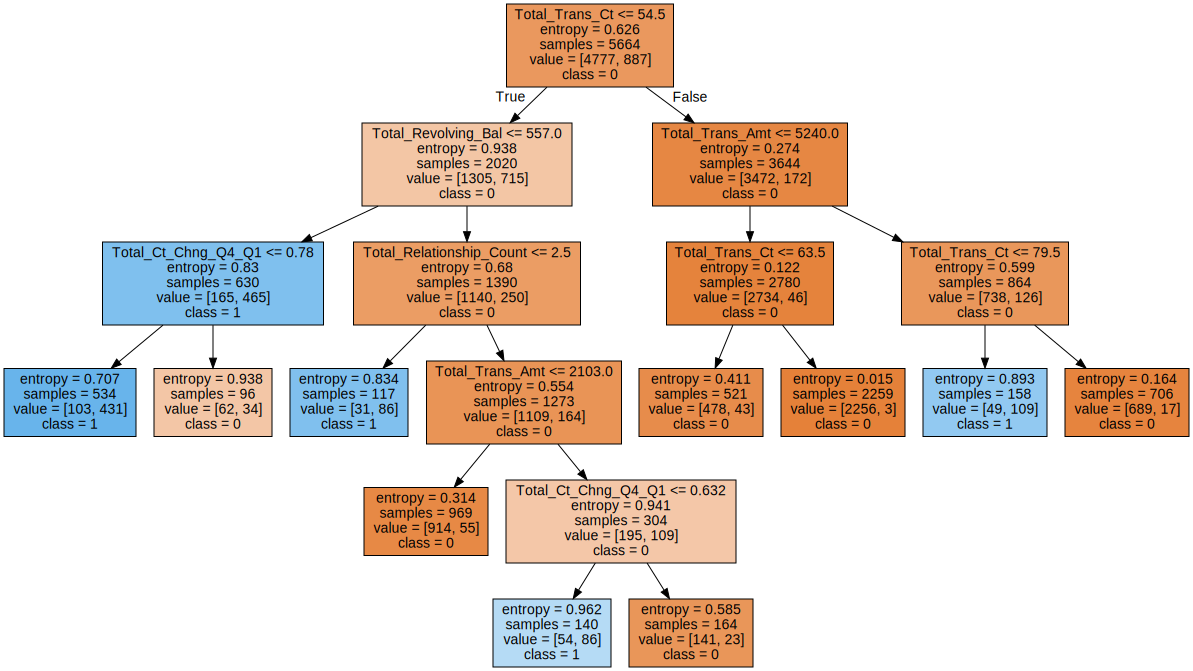

In [32]:
#display of decision tree
graph = Source(tree.export_graphviz(attrition_classifier, out_file=None
   , feature_names=X_train.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

In [33]:
#check error
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test, y_predicted)
print("MSE by using Decision Tree Classifier:" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE by using Decision Tree Classifier:" ,RMSE)

MSE by using Decision Tree Classifier: 0.07974594213126324
RMSE by using Decision Tree Classifier: 0.2823932402364887


In [34]:
#R2 and Adjusted R2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predicted)
print("R2 by using Decision Tree Classifier:" ,r2)
print("Adjusted R2 by using Decision Tree Classifier: ",1-(1-r2_score(y_test,y_predicted))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 by using Decision Tree Classifier: 0.4051217464315702
Adjusted R2 by using Decision Tree Classifier:  0.39703106152262235


# ** Gradient Boosting Classifier**


In [35]:
# For GBM, use GradientBoostingClassifier()
classifier = RandomForestClassifier()
grid_values = {'n_estimators':[50, 80,  110], 'max_depth':[3, 6, 8]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)


In [36]:
# Fit the object to train dataset
classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 8], 'n_estimators': [50, 80, 110]},
             scoring='roc_auc')

In [37]:
#prediction
test_preds=classifier.predict(X_test)
train_preds=classifier.predict(X_train)

In [38]:
# Obtain accuracy on train set
accuracy_score(y_train,train_preds)

0.9705155367231638

In [39]:

# Obtain accuracy on test set
accuracy_score(y_test,test_preds)

0.9350741002117149

In [40]:
# Calculate roc_auc score on train set
roc_auc_score(y_train,train_preds)

0.9150430508456175

In [41]:
# Calculate roc_auc score on test set
roc_auc_score(y_test,test_preds)

0.819763640281462

In [42]:
# Obtain the confusion matrix on train set
confusion_matrix(y_train,train_preds)

array([[4757,   20],
       [ 147,  740]])

In [43]:
 #Obtain the confusion matrix on test set
confusion_matrix(y_test,test_preds)

array([[1178,   13],
       [  79,  147]])

In [44]:
#MSE and RMSE
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test, test_preds)
print("MSE by using Gradient Boosting Classifier:" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE  by using Gradient Boosting Classifier :" ,RMSE)

MSE by using Gradient Boosting Classifier: 0.06492589978828511
RMSE  by using Gradient Boosting Classifier : 0.25480561176764754


In [45]:
#R2 and R2 adjusted
from sklearn.metrics import r2_score
r2 = r2_score(y_test, test_preds)
print("R2  by using Gradient Boosting Classifier:" ,r2)
print("Adjusted R2  by using Gradient Boosting Classifier: ",1-(1-r2_score(y_test,test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2  by using Gradient Boosting Classifier: 0.5156743422274731
Adjusted R2  by using Gradient Boosting Classifier:  0.5090872359299227
